<a href="https://colab.research.google.com/github/ikhlas15/ATHENS-AI-Medical-Imaging/blob/main/H04_ml_fundamentals_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 04: Machine Learning Fundamentals From Scratch (Medical Imaging)

Course: Artificial Intelligence in Medical Imaging: From Fundamentals to Applications

***

## 1) Introduction

Welcome! In previous notebooks, you learned how medical images are represented and how basic image operations work—from scratch and with libraries. Today we shift to Machine Learning (ML): we’ll build a simple classifier to detect pneumonia from chest X-rays.

You will implement a logistic regression model using only NumPy (no deep learning frameworks) to understand:
- How to structure a supervised learning problem for medical images.
- How to prepare image data (normalization, flattening).
- How predictions, loss, and gradients work.
- How to train and evaluate a model with sound metrics.

At the end, you’ll briefly compare your from-scratch model to a scikit-learn implementation.

What you will learn
- Supervised learning pipeline on medical images (PneumoniaMNIST).
- Logistic regression from scratch (forward, loss, gradients, update).
- Evaluation with accuracy, precision, recall, F1, ROC-AUC, PR-AUC.
- What preprocessing choices do to performance.

Prerequisites
- Notebook 00: environment + reproducibility.
- Notebook 01: medical imaging modalities and I/O basics.
- Notebook 02–03: image ops from scratch and with libraries.

***

## 2) Setup: Install packages and imports

We’ll use PneumoniaMNIST (chest X-ray classification) via the medmnist package. We’ll rely on NumPy, matplotlib, seaborn for visuals, and scikit-learn for standard ML metrics.


In [ ]:
# Colab: install required packages
!pip install -q medmnist scikit-learn seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, average_precision_score, precision_recall_curve,
    confusion_matrix
)

import medmnist
from medmnist import PneumoniaMNIST

# Pretty plots
sns.set_context("notebook")
sns.set_style("whitegrid")

In [ ]:
# Import required libraries
#  TODO: Import NumPy, Matplotlib, Seaborn, and the MedMNIST tools
import ... as np
import matplotlib. ... as plt
import ... as sns

#  TODO: Import the evaluation metrics from sklearn
from sklearn.metrics import (
    ________,        # accuracy
    ________,        # precision
    ________,        # recall
    ________,        # F1-score
    ________,        # ROC-AUC
    ________,        # ROC curve
    ________,        # Average precision
    ________,        # Precision–Recall curve
    ________         # Confusion matrix
)

# TODO: Import the MedMNIST package and the PneumoniaMNIST dataset class
import ...
from medmnist import ...


# Configure Plot Style
#TODO: Choose functions to set context (e.g., notebook) and style (e.g., whitegrid)
sns.________(...)
sns.________(...)

***

## 3) Reproducibility: fix random seeds

We will reuse the seed setup concept from Notebook 00 to keep results consistent across runs.

In [ ]:
# Fix randomness for reproducibility
# TODO: Import the required libraries for randomness and environment control
import ________        # Python's built-in random module
import ________        # Operating system module

def set_seed(seed=42):
    # TODO: Set the seed for Python's random generator


    # TODO: Set the seed for NumPy's random generator


    os.environ["PYTHONHASHSEED"] = str(seed)

# TODO: Call the seed function with seed 42


print("Seed fixed at 42.")


In [1]:
#The order of items in a set is based on something random (called a “hash”).
my_set = {"pneumonia", "normal", "covid"}
for item in my_set:
  print(item)

print(hash("pneumonia"))

covid
pneumonia
normal
1263661468750251844


***

## 4) Data: PneumoniaMNIST chest X-rays

We’ll load train/val/test splits. Labels: 0=Normal, 1=Pneumonia. Images are 28x28 grayscale (lightweight and perfect for demos).

In [ ]:
# Load PneumoniaMNIST dataset splits
# TODO: Create tvalidation and test datasets
train_ds = PneumoniaMNIST(split='train', download=True)
val_ds   = PneumoniaMNIST(split='...', download=...)
test_ds  = ...
# Inspect shapes
# TODO: Print the shapes of images and labels for each split
print("Train:", train_ds.imgs.shape, train_ds.labels.shape)
print("Val:  ", ... ,... )
print("Test: ", ... , ... )

# Extract numpy arrays
# TODO: Assign images and labels to X_train, y_train, etc.
X_train =       # (N, 28, 28) uint8
y_train =    # (N, 1) ints
X_val   =
y_val   =
X_test  =
y_test  =

# Squeeze labels to 1D
# TODO: Convert labels from shape (N, 1) → (N,)
y_train = y_train.reshape(-1)  # (N,)
y_val   =
y_test  =

print("After squeeze ->")
print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape,   y_val.shape)
print("Test: ", X_test.shape,  y_test.shape)

Train: (4708, 28, 28) (4708, 1)
Val:   (524, 28, 28) (524, 1)
Test:  (624, 28, 28) (624, 1)
After squeeze ->
Train: (4708, 28, 28) (4708,)
Val:   (524, 28, 28) (524,)
Test:  (624, 28, 28) (624,)


Let’s visualize a small grid of images to understand the data.


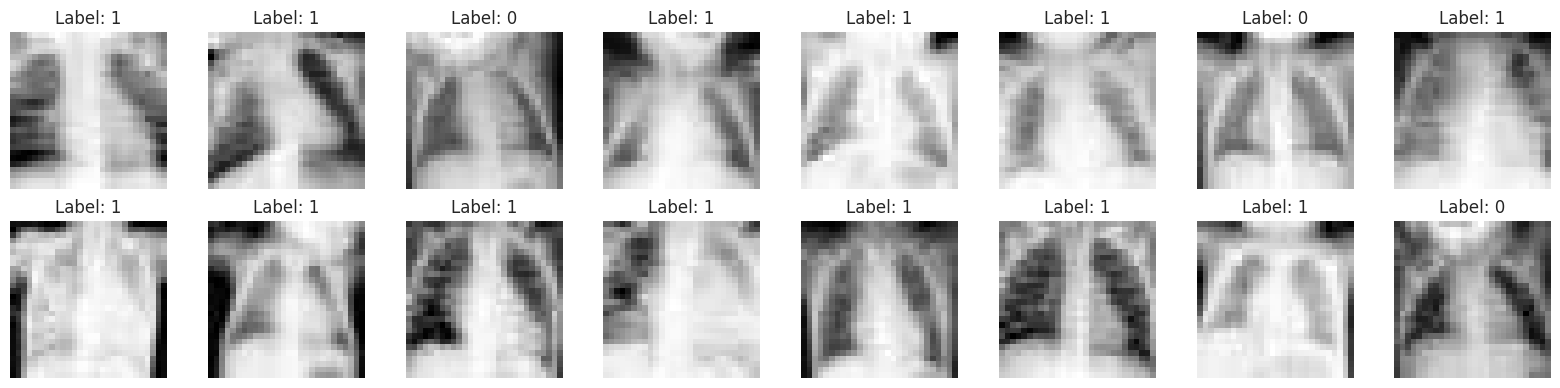

In [ ]:
# Function to visualize a grid of random images
# TODO: Complete the missing parts to make the function work
def show_grid(images, labels, n):
    # TODO: Randomly select n unique indices from the dataset
    idx = np.random.choice(len(images), size=..., replace=False)
    # TODO: Set the number of columns and compute number of rows
    cols =
    rows = int(np.ceil(n / cols))
    plt.figure(figsize=(2*cols, 2*rows))
    # TODO: Loop through the selected indices
    for i, j in enumerate(...):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[...], cmap='gray')
        plt.title(f"Label: {labels[...]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# TODO: Call the function to display 16 images


Medical context
- Chest X-rays are projections; pneumonia appears as opacities/airspace consolidations.
- Here, images are small (28x28) for teaching; real clinical models use higher resolution and more complex preprocessing.

***

## 5) Preprocessing: scale and flatten

Our from-scratch model expects vectors. We’ll:
- Scale pixel values to  (helps optimization).
- Flatten 2D images to 1D vectors.

We’ll also keep an option for standardization (z-score), but start with .

In [ ]:
# Preprocessing: scale + flatten images
# TODO: Complete the function using the math explained above

def preprocess_images(X, mode="scale01"):
    # TODO: Convert X to float32 using numpy
    X = X.astype(...)

    if mode == "scale01":
        # TODO: Scale pixel values from [0,255] to [0, 1]
        X = X / ...

    elif mode == "zscore":
        # TODO: Compute mean and standard deviation (X is a numpy aray)
        mean = X. ...
        std  = X. ... + 1e-8

        # TODO: Apply z-score standardization
        X = (X - mean) / ...

    else:
        raise ValueError("Unknown mode")

    # TODO: Flatten images from (N, H, W) to (N, H*W)
    N = X.shape[0]
    X = X.reshape(N, ...)

    return X

# Apply preprocessing to each dataset
# TODO: Choose mode and pass correct datasets
X_train_vec = preprocess_images(..., mode="...")
X_val_vec   = preprocess_images(..., mode="...")
X_test_vec  = preprocess_images(..., mode="...")

# Inspect vectorized shapes
print("Vectorized shapes:", X_train_vec.shape, X_val_vec.shape, X_test_vec.shape)


Vectorized shapes: (4708, 784) (524, 784) (624, 784)


Tip
- In medical imaging, normalization often depends on modality: for CT, windowing; for MRI, per-volume z-score; for X-ray, min-max/CLAHE. Our simple scaling is fine for this demo.

***

## 6) From scratch: logistic regression for binary classification

Logistic regression predicts P(y=1|x) via a sigmoid over a linear function of the inputs.

Model
- f(x) = sigmoid(x·w + b)
- Loss: binary cross-entropy (BCE)
- Optimization: minibatch gradient descent
- Optional: L2 regularization (weight decay) to reduce overfitting

We’ll implement vectorized training for speed and clarity.

In [ ]:
# TODO: Implement σ(z) = 1 / (1 + exp(-z))
def sigmoid(z):
    return ...

def bce_loss(y_true, y_prob, eps=1e-9):
    y_prob = np.clip(y_prob, eps, 1 - eps) #ensures we never do log(0).
    return ...

# This is a version of the Binary Cross-Entropy (BCE) loss that allows you to give more importance (weight) to one class over the other.
# Use it when your data is imbalanced (i.e punish more the rare class)
def bce_loss_weighted(y_true, y_prob, w_pos=1.0, w_neg=1.0, eps=1e-9):
    # Weighted BCE to handle class imbalance if needed
    y_prob = np.clip(y_prob, eps, 1 - eps)
    loss_pos = -w_pos * y_true * np.log(y_prob)
    loss_neg = -w_neg * (1 - y_true) * np.log(1 - y_prob)
    return np.mean(loss_pos + loss_neg)

def predict_proba(X, w, b):
    return sigmoid(X @ ... + ...)

def predict_label(X, w, b, threshold=0.5):
    return ((...) >= threshold).astype(int)

Training loop (minibatch, with optional L2 and class weights):

In [ ]:
def train_logreg(
    X_train, y_train,
    X_val,   y_val,
    lr=0.5, epochs=20, batch_size=256,
    l2=0.0, class_weights=None, # e.g., {"pos":w_pos, "neg":w_neg}
    verbose=True, seed=42
):
    # Fix randomness
    set_seed(...)
    # Get dataset shape
    N, D = X_train. ...
    # Initialize parameters as zeros w in R^D , b in R
    w = np.zeros(..., dtype=np.float32)
    b = .0

    history = {"train_loss": [], "val_loss": []}

    # Precompute class weights
    if class_weights is not None:
        w_pos = float(class_weights.get("pos", 1.0))
        w_neg = float(class_weights.get("neg", 1.0))
        use_weights = True
    else:
        w_pos = w_neg = 1.0
        use_weights = False

    idx = np.arange(N)
    for epoch in range(1, epochs+1):
        np.random.shuffle(idx)
        X_train = X_train[idx]
        y_train = y_train[idx]

        # Minibatch
        total_loss = 0.0
        batches = 0

        for start in range(0, N, batch_size):
            end = min(start + batch_size, N) #Ensures that the last batch doesn’t go out of bounds
            xb = X_train[start:end]
            yb = y_train[start:end].astype(np.float32) #Avoiding crashes or bad results from unsafe math operations, because we will multiply this value by float no (log(y) in the loss)

            # Forward: logits and probabilities
            z = xb @ w + ...
            yhat = sigmoid(...)

            # Loss (with optional weights + L2)
            if use_weights:
                loss = bce_loss_weighted(yb, yhat, ... , ...)
            else:
                loss = bce_loss(yb, yhat)

            if l2 > 0:
                loss += 0.5 * l2 * np.sum(w*w) / xb.shape[0]

            # Gradients
            # dL/dz = yhat - y
            err = (yhat - yb)

            # Weighted gradients if using class weights
            if use_weights:
                # per-sample scaling: w_pos for positives (y=1), w_neg for negatives
                weights = np.where(yb == 1.0, w_pos, w_neg)
                err = err * ...

            grad_w = (xb.T @ err) / xb.shape[0]
            grad_b = np.mean(err)

            # Add L2 gradient to the parameter w
            if l2 > 0:
                grad_w += l2 *

            # Update
            w -= lr * ...
            b -= lr * ...

            total_loss += loss
            batches += 1

        # Epoch losses
        train_loss = total_loss / max(batches, 1)
        # Validation loss
        yval_prob = predict_proba(X_val, w, b)
        val_loss = bce_loss(y_val, yval_prob)

        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)

        if verbose:
            print(f"Epoch {epoch:02d}/{epochs} | train_loss={train_loss:.4f} | val_loss={val_loss:.4f}")

    return w, b, history

Train the model:

In [ ]:
# Basic class balance check (to decide on class weights)
pos_rate = y_train.mean()
print(f"Training positive rate (pneumonia=1): {pos_rate:.3f}")

# You can set class weights if needed, e.g., inverse frequency
# class_weights = {"pos": 1.0/pos_rate, "neg": 1.0/(1-pos_rate)}
class_weights = None

w, b, history = train_logreg(
    X_train_vec, y_train,
    X_val_vec,   y_val,
    lr=0.01, epochs=20, batch_size=256, # Reduced learning rate
    l2=1e-4, class_weights=class_weights
)

Training positive rate (pneumonia=1): 0.742
Epoch 01/20 | train_loss=0.5588 | val_loss=0.5405
Epoch 02/20 | train_loss=0.5286 | val_loss=0.5168
Epoch 03/20 | train_loss=0.4997 | val_loss=0.5032
Epoch 04/20 | train_loss=0.4850 | val_loss=0.4767
Epoch 05/20 | train_loss=0.4658 | val_loss=0.4587
Epoch 06/20 | train_loss=0.4455 | val_loss=0.4433
Epoch 07/20 | train_loss=0.4311 | val_loss=0.4280
Epoch 08/20 | train_loss=0.4182 | val_loss=0.4152
Epoch 09/20 | train_loss=0.4054 | val_loss=0.4040
Epoch 10/20 | train_loss=0.3966 | val_loss=0.3987
Epoch 11/20 | train_loss=0.3877 | val_loss=0.3861
Epoch 12/20 | train_loss=0.3751 | val_loss=0.3742
Epoch 13/20 | train_loss=0.3679 | val_loss=0.3663
Epoch 14/20 | train_loss=0.3578 | val_loss=0.3583
Epoch 15/20 | train_loss=0.3523 | val_loss=0.3513
Epoch 16/20 | train_loss=0.3444 | val_loss=0.3452
Epoch 17/20 | train_loss=0.3379 | val_loss=0.3386
Epoch 18/20 | train_loss=0.3323 | val_loss=0.3336
Epoch 19/20 | train_loss=0.3257 | val_loss=0.3277
Epoch 

Plot training/validation loss curves:

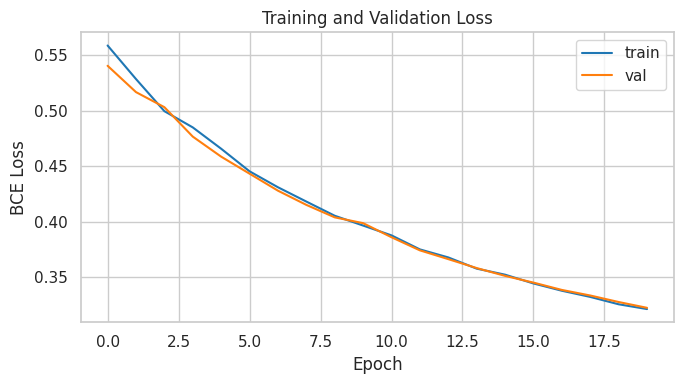

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(history["..."], label="train")
plt.plot(history["..."], label="val")
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.tight_layout()
plt.show()

## 7) Evaluation: accuracy and clinically relevant metrics

We’ll evaluate with multiple metrics. In medical tasks, accuracy alone can be misleading—report precision, recall (sensitivity), F1, ROC-AUC, and PR-AUC. Plot ROC and Precision-Recall curves, and a confusion matrix at a chosen threshold.


[Val] Accuracy:  0.866
[Val] Precision: 0.857  (Positive predictive value)
[Val] Recall:    0.985  (Sensitivity)
[Val] F1-score:  0.916
[Val] ROC-AUC:   0.960
[Val] PR-AUC:    0.985


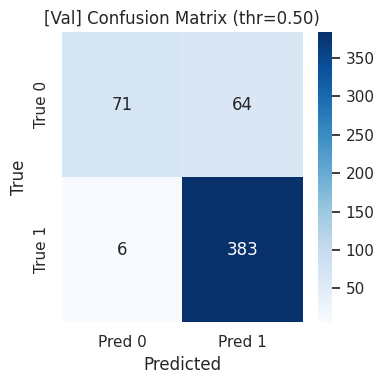

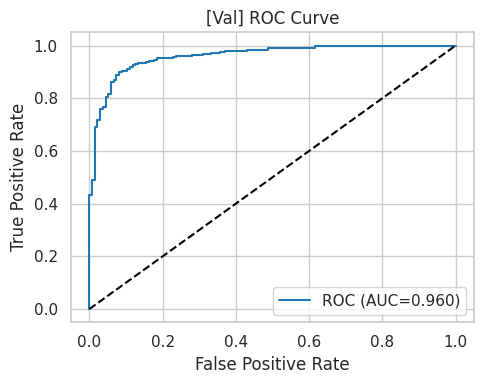

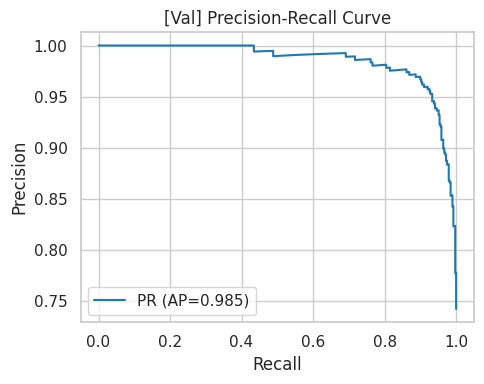

[Test] Accuracy:  0.766
[Test] Precision: 0.730  (Positive predictive value)
[Test] Recall:    0.992  (Sensitivity)
[Test] F1-score:  0.841
[Test] ROC-AUC:   0.902
[Test] PR-AUC:    0.911


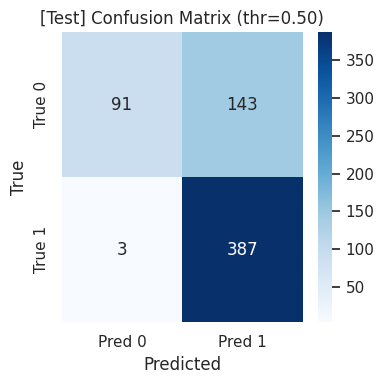

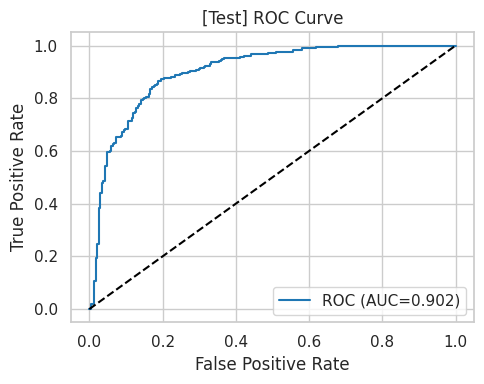

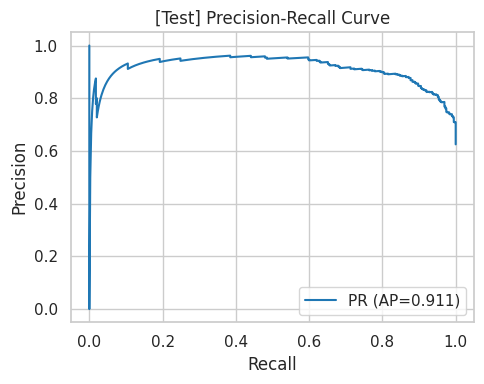

In [ ]:
def evaluate_classifier(X, y, w, b, threshold=0.5, title_prefix=""):
    y_prob = predict_proba(X, w, b)
    # TODO: convert probabilities to binary predictions
    y_pred = ...
    # TODO: compute accuracy
    acc = accuracy_score(...)
    # TODO: compute precision
    prec = ...(y, y_pred, zero_division=0)
    # TODO: compute recall
    rec =
    # TODO: compute F1-score
    f1 = ...

    # Some metrics require probabilities
    # TODO: compute ROC-AUC (inside try)
    try:
        rocauc = ...
    except Exception:
        rocauc = np.nan
    # TODO: compute Average Precision (PR-AUC)
    ap = ...(y, y_prob)

    print(f"{title_prefix} Accuracy:  {...:.3f}")
    print(f"{title_prefix} Precision: {...:.3f}  (Positive predictive value)")
    print(f"{title_prefix} Recall:    {...:.3f}  (Sensitivity)")
    print(f"{title_prefix} F1-score:  {...:.3f}")
    print(f"{title_prefix} ROC-AUC:   {...:.3f}")
    print(f"{title_prefix} PR-AUC:    {ap:.3f}")

    # TODO: compute confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(
        ________,                  # TODO: confusion matrix
        annot=______,              # TODO: True/False?
        fmt=_______,               # TODO: format ('d')
        cmap=__________,           # TODO: choose color map
        xticklabels=["Pred 0","Pred 1"], yticklabels=["True 0","True 1"]
    )
    plt.title(f"{title_prefix} Confusion Matrix (thr={...:.2f})")
    plt.xlabel(______________)      # TODO: x-axis label is Predicted
    plt.ylabel(______________)      # TODO: y-axis label is True
    plt.tight_layout()
    plt.show()



    # ROC curve
    fpr, tpr, _ = roc_curve(y, y_prob)
    # TODO: Dislpay ROC curve with figsize = (5,4)
    plt.figure(...)
    plt.plot(... label=f"ROC (AUC={rocauc:.3f})")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{title_prefix} ROC Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Precision-Recall curve
    prec_curve, rec_curve, _ = precision_recall_curve(y, y_prob)
    #Display the results for Precision-Recall curve, x-label is Recall, ylabel is Prescision


# Evaluate on validation and test sets
evaluate_classifier(X_val_vec,  y_val,  w, b, threshold=0.5, title_prefix="[Val]")
#TODO: Evaluate on test set
...

Clinical reflection
- Sensitivity (recall) is crucial in screening: missing pneumonia could be harmful.
- Precision is important to avoid unnecessary follow-up.
- Consider adjusting the threshold to meet a desired sensitivity (we’ll study this in depth in the evaluation notebook).

Threshold tuning example (optional):

Selected threshold to reach >=90% sensitivity (on val): 0.01
[Test tuned] Accuracy:  0.625
[Test tuned] Precision: 0.625  (Positive predictive value)
[Test tuned] Recall:    1.000  (Sensitivity)
[Test tuned] F1-score:  0.769
[Test tuned] ROC-AUC:   0.902
[Test tuned] PR-AUC:    0.911


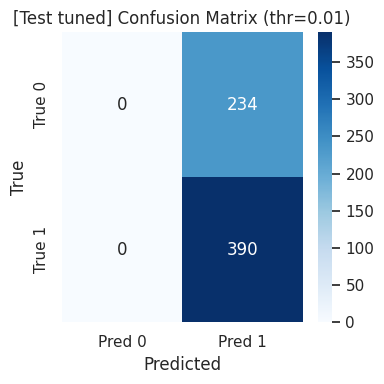

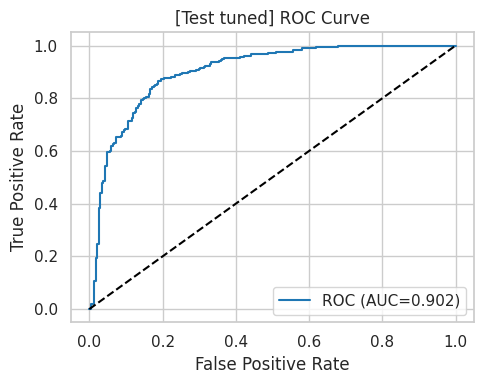

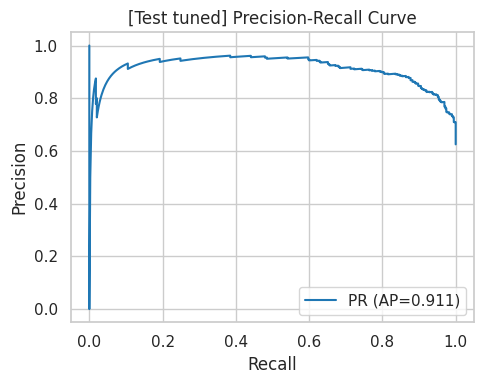

In [ ]:
# Example: choose threshold to achieve >= target sensitivity on validation, then apply to test
target_sensitivity = 0.90
# TODO: compute validation probabilities
y_val_prob = predict_proba()
thr_candidates = np.linspace(0.01, 0.99, 99)

best_thr =    # TODO: initialize default threshold
for thr in thr_candidates:
  # TODO: compute predictions at this threshold
    y_pred = ...

    rec = recall_score(..., zero_division=0)
    # TODO: check if sensitivity requirement is met
    if rec >= ...:
        best_thr = thr
        break

print(f"Selected threshold to reach >={target_sensitivity*100:.0f}% sensitivity (on val): {best_thr:.2f}")

# TODO: evaluate classifier on test set using tuned threshold
evaluate_classifier(...)


***

## 8) Quick comparison: scikit-learn LogisticRegression

Let’s compare our from-scratch model to a standard implementation.

In [ ]:
# TODO: import the LogisticRegression model from scikit-learn's linear_model module


# Scikit-learn expects y as 1D array of 0/1 and X as (N, D)
# TODO : call the Logisticregression and set the reguralization as 'l2', and it's strength is 1, the optimizer is 'lbfgs', and maximum number of iterations as 500
clf =
# TODO: train the model using fit
clf. ....

# Evaluate
def evaluate_sklearn(clf, X, y, prefix=""):
    # TODO: get predicted probabilities for class 1
    y_prob = clf.predict_proba(...)[:,...]
    # TODO: predict the image
    y_pred = clf.

    # TODO: compute metrics
    acc = accuracy_score(...)
    prec = precision_score(..., zero_division=0)
    #TODO: compute recall score
    rec =
    #TODO: compute F1-score
    f1 =

    # TODO: compute ROC-AUC and PR-AUC
    rocauc = ...
    ap = average_precision_score(...)

    # TODO: print results
    print(f"{prefix} Accuracy:  {:.3f}")
    print(f"{prefix} Precision: {:.3f}")
    print(f"{prefix} Recall:    {:.3f}")
    print(f"{prefix} F1-score:  {:.3f}")
    print(f"{prefix} ROC-AUC:   {:.3f}")
    print(f"{prefix} PR-AUC:    {:.3f}")

print("Scikit-learn LogisticRegression performance:")
# Evaluate on validation and test sets
# TODO: evaluate model on validation set

evaluate_sklearn(clf, X_test_vec, y_test, prefix="[Test]")

Scikit-learn LogisticRegression performance:
[Val] Accuracy:  0.952
[Val] Precision: 0.960
[Val] Recall:    0.977
[Val] F1-score:  0.968
[Val] ROC-AUC:   0.991
[Val] PR-AUC:    0.997
[Test] Accuracy:  0.845
[Test] Precision: 0.810
[Test] Recall:    0.982
[Test] F1-score:  0.888
[Test] ROC-AUC:   0.924
[Test] PR-AUC:    0.923


Connections to earlier and later notebooks

- You applied contrast normalization and vectorization (related to preprocessing in notebooks 02–03).
- The notion of convolution from notebook 02 is the foundation of CNNs (coming soon).
- Metric selection (accuracy vs sensitivity/specificity) is crucial in medical AI; we’ll go deeper on thresholds and calibration in the evaluation-focused notebook.

***

## 9) Exercises and what-if experiments

Try these to deepen understanding:

- Learning rate and batch size:
  - Increase/decrease lr (e.g., 0.1, 0.5, 1.0) and batch_size (e.g., 64, 256, 1024). Observe loss curves and final metrics.
- Regularization:
  - Increase l2 (e.g., 1e-3, 1e-2) to reduce overfitting. Compare validation loss.
- Class imbalance:
  - Compute positive fraction; set class_weights={"pos":1/pos_rate, "neg":1/(1-pos_rate)} and retrain. Did recall improve?
- Preprocessing:
  - Compare scale01 vs zscore normalization.
- Data leakage:
  - Never use the test set for model decisions (e.g., threshold). Use validation only.

***

## 10) Summary

